In [5]:
import os
import sys
from glob import glob
import json

In [7]:
base = "../../Report-nmi-wsi"
path = "test_annotation.json"
file_path = os.path.join(base,path)
print(file_path)

../../Report-nmi-wsi/test_annotation.json


In [29]:
# Read the JSON file
with open(file_path, 'r') as json_file:
    data = json.load(json_file)

# Extract the keys and print them
keys = list(data.keys())
# print("Keys:", keys)

# Print the first key-value pair
if keys:
    first_key = keys[0]
    first_value = data[first_key]['caption']
    print("First Key:", first_key)
    print("First Value:", first_value)
else:
    print("The JSON file is empty.")

First Key: 1_00143_sub0_021
First Value: ['Minimal variability in nuclear size shape and outline consistent with moderate pleomorphism. Mild nuclear crowding is seen. There is marked disorganization and lack of cellular polarity toward the surface urothelium. Mitosis is infrequent. The nucleoli of nuclei are prominent. High grade.', 'Minimal variability in nuclear size shape and outline consistent with moderate pleomorphism. There is a mild degree of crowding. Architecturally the cells show complete lack of polarity toward the surface urothelium. There are infrequent mitotic figures throughout the tissue. Prominent nucleoli are easily identified in low magnification scanning. High grade.', 'Moderate pleomorphism and cytologic atypia is present. Nuclei are mildly crowded together. Polarity is completely lost. Mitosis is infrequent throughout the tissue. Prominent nucleoli are easily identified in low magnification scanning. High grade.', 'Moderate pleomorphism is present. The nuclei are

In [11]:
filename = "fadfa.bin"
base_name, _ = os.path.splitext(filename)
new_filename = base_name + ".jpg"
print(new_filename)

fadfa.jpg


In [12]:
!ls graph

assignment_mat cell_graphs    tissue_graphs


In [16]:
cg_path = "graph/cell_graphs/test"
cg = glob(os.path.join(cg_path, '*.bin'))
cg.sort()
num_cg = len(cg)
print(cg)

['graph/cell_graphs/test/1_00061_sub0_002.bin', 'graph/cell_graphs/test/1_00061_sub0_004.bin']


In [34]:
new_file_names = [os.path.splitext(os.path.split(i)[-1])[0] for i in cg]
print(new_file_names)

['1_00061_sub0_002', '1_00061_sub0_004']


In [21]:
for i in cg:
    spt = os.path.split(i)[-1]
    base_name, _ = os.path.splitext(spt)
    new_filename = base_name + ".jpg"
    print(new_filename)

1_00061_sub0_002.jpg
1_00061_sub0_004.jpg


In [53]:
!ls ../../Report-nmi-wsi

Images                nmi-wsi.zip           train_annotation.json
Images.zip            test
class.json            test_annotation.json


In [51]:
all_image = glob("../../Report-nmi-wsi/Images/*.png")
print(len(all_image))

4253


In [54]:
test_report = "../../Report-nmi-wsi/test_annotation.json"
train_report = "../../Report-nmi-wsi/train_annotation.json"

with open(test_report, 'r') as test_file:
    t_data = json.load(test_file)
    print(len(t_data.keys()))

with open(train_report, 'r') as train_file:
    tr_data = json.load(train_file)
    print(len(tr_data.keys()))



1889
2364


In [56]:
a = '1_00061_sub0_002'
if a in t_data.keys():
    print(a)
if a in tr_data.keys():
    print("fdsfas")

fdsfas


In [69]:
# report_path = "../../Report-nmi-wsi"
# split = "train"
# split_annotation = split+"_annotation.json"
# report_path = os.path.join(report_path,split_annotation)
# print(report_path)
# print(file_path)
# with open(report_path, 'r') as json_file:
#     report_data = json.load(json_file)
#     print(report_data)
# print(new_file_names)
# values_in_order = [report_data[key]['caption'] for key in new_file_names if key in report_data.keys()]
# print(len(values_in_order[0]))

In [248]:
from dgl.data.utils import load_graphs
from glob import glob
graph_path = "./graph"
split = "test" # Train Test Eval
cg_path = os.path.join(graph_path,"cell_graphs",split)
print(cg_path)

cgs = glob(os.path.join(cg_path,'*bin'))
print(len(cgs))
# print()
# cell_graphs = [load_graphs(cg) for cg in cgs]
# for i in cell_graphs:
#     print(i[0][0[]])


./graph/cell_graphs/test
13


In [14]:
print(first[0])
print(first[0][0])

[Graph(num_nodes=290, num_edges=1419,
      ndata_schemes={'feat': Scheme(shape=(514,), dtype=torch.float32), 'centroid': Scheme(shape=(2,), dtype=torch.float32)}
      edata_schemes={})]
Graph(num_nodes=290, num_edges=1419,
      ndata_schemes={'feat': Scheme(shape=(514,), dtype=torch.float32), 'centroid': Scheme(shape=(2,), dtype=torch.float32)}
      edata_schemes={})


In [37]:
import dgl
import dgl.nn.pytorch as dglnn
import torch
import torch.nn as nn
import torch.nn.functional as F

In [38]:
class GCN(nn.Module):
    def __init__(self, in_feats, hidden_feats, out_feats):
        super(GCN, self).__init__()
        self.conv1 = dglnn.GraphConv(in_feats, hidden_feats)
        self.conv2 = dglnn.GraphConv(hidden_feats, out_feats)

    def forward(self, g, features):
        # Apply the first GraphConv layer
        x = F.relu(self.conv1(g, features))
        # Apply the second GraphConv layer
        x = self.conv2(g, x)
        return x

In [265]:
import os
from dataloader import make_dataloader
from Vocabulary import Vocabulary
loader = make_dataloader(
    batch_size = 2,
    split = "test",
    base_data_path = "../../Report-nmi-wsi",
    graph_path = "graph",
    vocab_path = "../../Report-nmi-wsi/vocab_bladderreport.pkl",
    shuffle=True,
    num_workers=0,
    load_in_ram = True
)



In [267]:
import networkx as nx
# a dataset with 80 samples, each graph is
#  of size [10, 20]

for batch_idx, batch_data in enumerate(loader):
    # Your batch processing code here
    cg, tg, assign_mat, caption_tokens, label, caption = batch_data
    tg_list = dgl.unbatch(tg)
    graph_list = tg_list[0:4]
    for i in graph_list:
        zero = (i.in_degrees() == 0).any()
        if zero:
            nx.draw(i.to_networkx())
            break
            # print(f"    In loop, Have 0 degree {zero}")
            # print(i)
            # srcs, dsts = i.all_edges()
            # i.add_edges(dsts, srcs)
            # i.remove_self_loop().add_self_loop()
            # zero = (i.in_degrees() == 0).any()
            # print(f"    After is {zero}")
            # print(i)
            break
        batched_graph = dgl.batch(graph_list)
    break

In [263]:
import numpy as np
for batch_idx, batch_data in enumerate(loader):
    # Your batch processing code here
    cg, tg, assign_mat, caption_tokens, label, caption = batch_data
    cg_list = dgl.unbatch(cg)
    print(cg_list[0])
    print(assign_mat[0].shape)
    g = cg_list[0]
    print(g)

    # first_contains_zero = (batched_graph.in_degrees() == 0).any()
    # out_contains_zero = (batched_graph.out_degrees() == 0).any()
    # print(first_contains_zero)
    # print(out_contains_zero)
    # print(batched_graph.in_degrees())
    # print(batched_graph.out_degrees())
    # batched_graph = cg_list[1]
    # print(cg_list[0].in_degrees())
    # print(cg_list[0].out_degrees())
    # srcs, dsts = cg_list[0].all_edges()
    # cg_list[0].add_edges(dsts, srcs)
    # print(cg_list[0].in_degrees())
    # print(cg_list[0].out_degrees())
    # first_contains_zero = (cg_list[0].in_degrees() == 0).any()
    # print(f"First {first_contains_zero}")
    # # print(cg_list[1].in_degrees())
    # second_contains_zero = (cg_list[1].in_degrees() == 0).any()
    # print(f"Second {second_contains_zero}")
    # batch_contain_zero = (batched_graph.in_degrees() == 0).any()
    # print(f"Second {batch_contain_zero}")
    # Example input features (random data)
#     num_nodes = batched_graph.number_of_nodes()
#     in_feats = 3  # Input feature dimension
#     features = torch.randn(num_nodes, in_feats
    break

Graph(num_nodes=395, num_edges=2362,
      ndata_schemes={'feat': Scheme(shape=(514,), dtype=torch.float32), 'centroid': Scheme(shape=(2,), dtype=torch.float32)}
      edata_schemes={})
torch.Size([395, 8])
Graph(num_nodes=395, num_edges=2362,
      ndata_schemes={'feat': Scheme(shape=(514,), dtype=torch.float32), 'centroid': Scheme(shape=(2,), dtype=torch.float32)}
      edata_schemes={})


In [6]:
# Create a list of individual graphs (DGLGraph objects)
graph_list = [dgl.graph((0, 1)), dgl.graph((1, 2))]

# Batch the graphs into a single batched graph
batched_graph = dgl.batch(graph_list)

# Example input features (random data)
num_nodes = batched_graph.number_of_nodes()
in_feats = 3  # Input feature dimension
features = torch.randn(num_nodes, in_feats)

# Create the GCN model
hidden_feats = 4
out_feats = 2
gcn_model = GCN(in_feats, hidden_feats, out_feats)
print(features.shape)
# Forward pass
output = gcn_model(batched_graph, features)
print(output.shape)

TypeError: object of type 'int' has no len()

3
Graph(num_nodes=9, num_edges=29,
      ndata_schemes={'feat': Scheme(shape=(514,), dtype=torch.float32), 'centroid': Scheme(shape=(2,), dtype=torch.float32)}
      edata_schemes={})


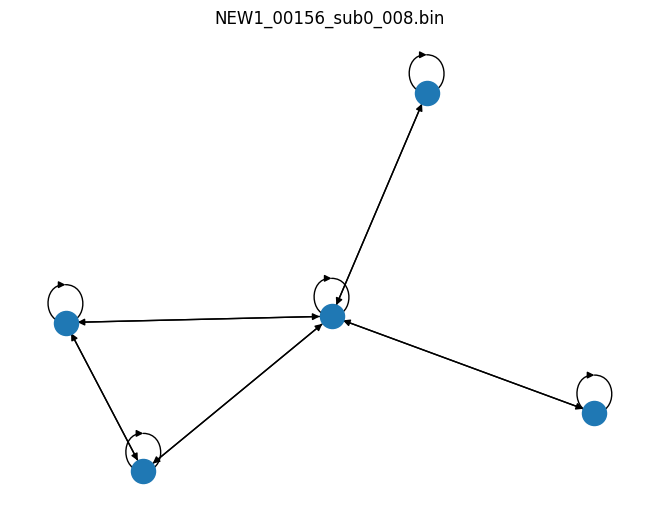

Graph(num_nodes=5, num_edges=15,
      ndata_schemes={'feat': Scheme(shape=(514,), dtype=torch.float32), 'centroid': Scheme(shape=(2,), dtype=torch.float32)}
      edata_schemes={})


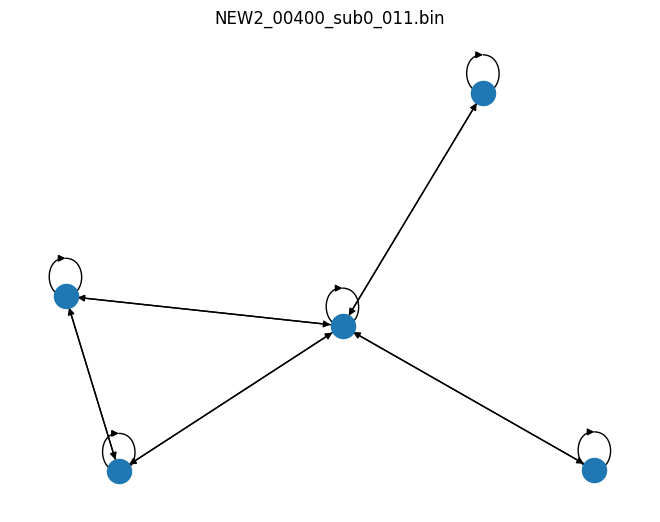

Graph(num_nodes=8, num_edges=28,
      ndata_schemes={'feat': Scheme(shape=(514,), dtype=torch.float32), 'centroid': Scheme(shape=(2,), dtype=torch.float32)}
      edata_schemes={})


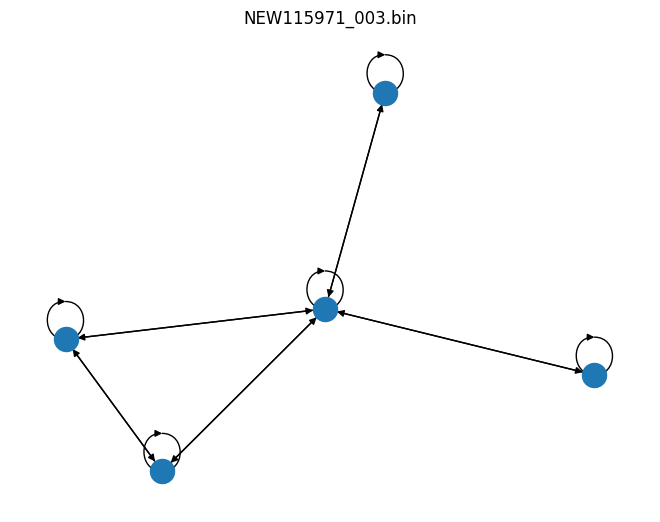

In [268]:
import matplotlib.pyplot as plt
directory = "graph/tissue_graphs/test"
graph_files = [f for f in os.listdir(directory) if f.endswith('.bin')][0:3]
# graph_files = ["1_00143_sub0_049.bin"]
print(len(graph_files))
graph_list = []
for graph_file in graph_files:
    graph_path = os.path.join(directory, graph_file)
    
    # Use DGL's function to read the binary graph
    graph = dgl.load_graphs(graph_path)[0][0]  # Assuming there's only one graph per file
    print(graph.ndata["feat"])
    graph_list.append(graph)
    print(graph)
    # nx.draw(i.to_networkx())
    # plt.title("NEW"+graph_file)  # Specify your desired title here
    # # Show the plot
    # plt.show()

    # # in_degrees = graph.in_degrees().numpy()
    # # out_degrees = graph.out_degrees().numpy()
    # # isolated_nodes = (in_degrees == 0) & (out_degrees == 0)

    # # # Remove isolated nodes
    # # graph.remove_nodes(isolated_nodes)
    # nx.draw(i.to_networkx())
    # plt.title("NEW"+graph_file)  # Specify your desired title here
    # # Show the plot
    # plt.show()
    # break
# print('------------BATCHING-------------')
# batch = dgl.batch(graph_list)
# print(batch)
# print('------------BATCHING-------------')
# unbatch = dgl.unbatch(batch)
# for i in unbatch:
#     print(i)



    